In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Primero que todo, vamos a cargar los datasets dentro de un par de dataframes de Pandas

hsptl_test_df = pd.read_csv("../data/raw/hospitalizaciones_test.csv")
hsptl_train_df = pd.read_csv("../data/raw/hospitalizaciones_train.csv")

In [2]:
# Después, hacemos una revisión superficial de los datos de entrenamiento
# Buscando cuales variables son numericas y cuales son categoricas

hsptl_train_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
0,4,gynecology,D,Dr Sophia,0,33070,41-50,Female,Trauma,Extreme,Diabetes,4,Yes,2966.408696,8
1,4,gynecology,B,Dr Sophia,2,34808,31-40,Female,Trauma,Minor,Heart disease,2,No,3554.835677,9
2,2,gynecology,B,Dr Sophia,8,44577,21-30,Female,Trauma,Extreme,Diabetes,2,Yes,5624.733654,7
3,4,gynecology,D,Dr Olivia,7,3695,31-40,Female,Urgent,Moderate,None,4,No,4814.149231,8
4,2,anesthesia,E,Dr Mark,10,108956,71-80,Male,Trauma,Moderate,Diabetes,2,No,5169.269637,34


In [3]:
hsptl_train_df.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)
409995,1,gynecology,D,Dr Sarah,1,63105,31-40,Female,Trauma,Minor,Asthama,3,Yes,3902.291076,8
409996,5,gynecology,D,Dr Nathan,5,129292,21-30,Female,Trauma,Extreme,Other,4,No,4771.995223,9
409997,4,gynecology,D,Dr Sarah,9,11399,21-30,Female,Emergency,Minor,Asthama,4,Yes,3816.994210,9
409998,10,gynecology,D,Dr Olivia,10,75003,21-30,Female,Trauma,Moderate,Other,2,Yes,3841.577491,9
409999,3,gynecology,F,Dr Nathan,0,128183,41-50,Female,Trauma,Minor,Other,8,Yes,4329.046412,8


In [4]:
# Revisamos primero cuales son los valores nulos en nuestras columnas
hsptl_train_df.isna().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
gender                               0
Type of Admission                    0
Severity of Illness                  0
health_conditions                    0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Stay (in days)                       0
dtype: int64

In [28]:
hsptl_train_df.isnull().sum()

Available Extra Rooms in Hospital    0
Department                           0
Ward_Facility_Code                   0
doctor_name                          0
staff_available                      0
patientid                            0
Age                                  0
Severity of Illness                  0
Visitors with Patient                0
Insurance                            0
Admission_Deposit                    0
Female                               0
Male                                 0
OtherGenres                          0
Emergency                            0
Trauma                               0
Urgent                               0
Asthama                              0
Diabetes                             0
Heart disease                        0
High Blood Pressure                  0
OtherDiseases                        0
StayLength                           0
dtype: int64

In [5]:
# Después, verificamos sí hay valores duplicados o no en nuestro dataset
hsptl_train_df[hsptl_train_df.duplicated()]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,gender,Type of Admission,Severity of Illness,health_conditions,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days)


In [6]:
# Ya que no hay valores nulos ni duplicados, podemos a pasar a revisar si nuestras columnas categoricas tienen typos o valores extraños
print(hsptl_train_df['Department'].unique())
print(hsptl_train_df['Ward_Facility_Code'].unique())
print(hsptl_train_df['doctor_name'].unique())
print(hsptl_train_df['Age'].unique())
print(hsptl_train_df['gender'].unique())
print(hsptl_train_df['Type of Admission'].unique())
print(hsptl_train_df['Severity of Illness'].unique())
print(hsptl_train_df['health_conditions'].unique())

['gynecology' 'anesthesia' 'TB & Chest disease' 'radiotherapy' 'surgery']
['D' 'B' 'E' 'F' 'A' 'C']
['Dr Sophia' 'Dr Olivia' 'Dr Mark' 'Dr John' 'Dr Sarah' 'Dr Sam'
 'Dr Nathan' 'Dr Simon' 'Dr Isaac']
['41-50' '31-40' '21-30' '71-80' '11-20' '51-60' '61-70' '81-90' '91-100'
 '0-10']
['Female' 'Male' 'Other']
['Trauma' 'Urgent' 'Emergency']
['Extreme' 'Minor' 'Moderate']
['Diabetes' 'Heart disease' 'None' 'Other' 'Asthama' 'High Blood Pressure']


In [7]:
# Asumimos entonces que nuestros datos estan limpios, y podemos empezar a codificar los datos categoricos
# Primero las categorias ordinales
enc = OrdinalEncoder()
hsptl_train_df.Age = enc.fit_transform(hsptl_train_df[["Age"]])
enc.set_params(categories=[['Minor','Moderate','Extreme']])
hsptl_train_df[['Severity of Illness']] = enc.fit_transform(hsptl_train_df[['Severity of Illness']])
enc.set_params(categories=[['No','Yes']])
hsptl_train_df.Insurance = enc.fit_transform(hsptl_train_df[['Insurance']])


In [8]:
ohe = OneHotEncoder()

feature_array = ohe.fit_transform(hsptl_train_df[["gender"]]).toarray()
feature_labels = np.array(ohe.categories_).ravel()
feature_labels = np.delete(feature_labels, 2)
feature_labels = np.append(feature_labels, 'OtherGenres')
ohe_admission = pd.DataFrame(feature_array, columns=feature_labels)
hsptl_train_df = pd.concat([hsptl_train_df, ohe_admission], axis=1)
hsptl_train_df.drop('gender',axis=1, inplace=True)

In [9]:
# Y después las categorías nominales 
feature_array = ohe.fit_transform(hsptl_train_df[["Type of Admission"]]).toarray()
feature_labels = np.array(ohe.categories_).ravel()
ohe_admission = pd.DataFrame(feature_array, columns=feature_labels)
hsptl_train_df = pd.concat([hsptl_train_df, ohe_admission], axis=1)
hsptl_train_df.drop('Type of Admission',axis=1, inplace=True)

In [10]:
feature_array = ohe.fit_transform(hsptl_train_df[["health_conditions"]]).toarray()
feature_labels = np.array(ohe.categories_).ravel()
ohe_admission = pd.DataFrame(feature_array, columns=feature_labels)
ohe_admission.drop(['None'], axis=1, inplace=True)
ohe_admission.rename(columns={'Other':'OtherDiseases'},inplace=True)
hsptl_train_df = pd.concat([hsptl_train_df, ohe_admission], axis=1)
hsptl_train_df.drop('health_conditions',axis=1, inplace=True)

In [11]:
hsptl_train_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,Severity of Illness,Visitors with Patient,Insurance,...,Male,OtherGenres,Emergency,Trauma,Urgent,Asthama,Diabetes,Heart disease,High Blood Pressure,OtherDiseases
0,4,gynecology,D,Dr Sophia,0,33070,4.0,2.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4,gynecology,B,Dr Sophia,2,34808,3.0,0.0,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,2.0,2.0,2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,gynecology,D,Dr Olivia,7,3695,3.0,1.0,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,anesthesia,E,Dr Mark,10,108956,7.0,1.0,2,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
hsptl_train_df.corr()
# En esta matriz de correlación, podemos observar que las variables que más estan correlacionadas con la estadia son la edad,
# el sí es varón o algún genero aparte de hombre/mujer.

C:\Users\pukeboy71\AppData\Local\Temp\ipykernel_13356\475443552.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  hsptl_train_df.corr()


,Available Extra Rooms in Hospital,staff_available,patientid,Age,Severity of Illness,Visitors with Patient,Insurance,Admission_Deposit,Stay (in days),Female,Male,OtherGenres,Emergency,Trauma,Urgent,Asthama,Diabetes,Heart disease,High Blood Pressure,OtherDiseases
Available Extra Rooms in Hospital,1.000000,-0.003064,-0.005426,-0.029921,-0.037610,0.071073,0.002438,-0.050775,-0.019383,0.040879,-0.036502,-0.014071,0.006038,-0.036584,0.048693,-0.001906,-0.001202,0.000288,0.002685,0.000254
staff_available,-0.003064,1.000000,-0.000350,0.001818,0.001793,0.001444,0.001245,0.000816,0.006673,-0.004291,0.003900,0.001339,0.001269,0.000428,-0.002497,0.002259,-0.001979,0.001911,0.000112,-0.001899
patientid,-0.005426,-0.000350,1.000000,0.009765,0.007617,-0.006393,0.001827,0.011602,0.005567,-0.011678,0.010695,0.003474,-0.032213,0.031428,-0.002963,-0.000197,-0.001709,-0.002631,0.000012,0.001686
Age,-0.029921,0.001818,0.009765,1.000000,0.051760,0.030136,-0.002472,0.016743,0.585201,-0.529038,0.468465,0.190149,-0.012516,0.016468,-0.007828,-0.057827,0.019836,0.055281,-0.064272,0.021685
Severity of Illness,-0.037610,0.001793,0.007617,0.051760,1.000000,-0.007543,-0.002555,-0.019267,0.055916,-0.051816,0.044370,0.021723,-0.110176,0.133155,-0.050386,0.106348,0.129935,-0.017176,-0.103210,-0.032825
Visitors with Patient,0.071073,0.001444,-0.006393,0.030136,-0.007543,1.000000,0.025426,-0.069566,0.027284,-0.052431,0.047577,0.016493,0.026949,-0.024539,-0.000270,0.002645,-0.002017,-0.000939,-0.005999,-0.003651
Insurance,0.002438,0.001245,0.001827,-0.002472,-0.002555,0.025426,1.000000,0.001164,-0.000947,-0.006007,0.010570,-0.008587,0.002375,-0.001835,-0.000537,-0.002943,-0.004294,-0.026992,0.015878,0.000148
Admission_Deposit,-0.050775,0.000816,0.011602,0.016743,-0.019267,-0.069566,0.001164,1.000000,0.043899,-0.039555,0.033725,0.016881,-0.020516,0.016981,0.002872,-0.000334,0.000531,-0.000117,0.000424,0.002329
Stay (in days),-0.019383,0.006673,0.005567,0.585201,0.055916,0.027284,-0.000947,0.043899,1.000000,-0.629616,0.560633,0.219943,-0.048191,0.044596,-0.000639,-0.000215,-0.001056,-0.001969,0.000950,0.002701
Female,0.040879,-0.004291,-0.011678,-0.529038,-0.051816,-0.052431,-0.006007,-0.039555,-0.629616,1.000000,-0.889283,-0.351692,0.031156,-0.015536,-0.020440,0.004313,0.001556,-0.021473,-0.001386,-0.000421


In [13]:
# Es razonable esperar que los pacientes nobinarios sean una minoría, así que revisamos las filas con este valor para ver si la correlación
# es causada por unos cuantos outliers
hsptl_train_df[hsptl_train_df.OtherGenres == 1]

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,Severity of Illness,Visitors with Patient,Insurance,...,Male,OtherGenres,Emergency,Trauma,Urgent,Asthama,Diabetes,Heart disease,High Blood Pressure,OtherDiseases
8,2,TB & Chest disease,A,Dr John,7,80339,3.0,1.0,2,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
10,4,anesthesia,A,Dr John,9,43685,3.0,0.0,2,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
16,3,radiotherapy,E,Dr John,6,59508,3.0,1.0,6,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,4,radiotherapy,E,Dr John,5,116434,5.0,1.0,4,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20,2,radiotherapy,E,Dr John,5,46808,2.0,2.0,4,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409966,4,radiotherapy,A,Dr John,1,101120,3.0,2.0,2,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
409971,1,radiotherapy,E,Dr John,10,33423,4.0,1.0,2,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
409983,2,radiotherapy,A,Dr John,4,126803,6.0,0.0,2,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
409991,3,radiotherapy,E,Dr John,4,82109,7.0,2.0,3,1.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
# Finalmente, hacemos una revisión superficial de los datos de prueba con el proposito de revisar si estan estructurados igual

hsptl_train_df.head()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,Severity of Illness,Visitors with Patient,Insurance,...,Male,OtherGenres,Emergency,Trauma,Urgent,Asthama,Diabetes,Heart disease,High Blood Pressure,OtherDiseases
0,4,gynecology,D,Dr Sophia,0,33070,4.0,2.0,4,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4,gynecology,B,Dr Sophia,2,34808,3.0,0.0,2,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,gynecology,B,Dr Sophia,8,44577,2.0,2.0,2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4,gynecology,D,Dr Olivia,7,3695,3.0,1.0,4,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2,anesthesia,E,Dr Mark,10,108956,7.0,1.0,2,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
hsptl_train_df.tail()

,Available Extra Rooms in Hospital,Department,Ward_Facility_Code,doctor_name,staff_available,patientid,Age,Severity of Illness,Visitors with Patient,Insurance,...,Male,OtherGenres,Emergency,Trauma,Urgent,Asthama,Diabetes,Heart disease,High Blood Pressure,OtherDiseases
409995,1,gynecology,D,Dr Sarah,1,63105,3.0,0.0,3,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
409996,5,gynecology,D,Dr Nathan,5,129292,2.0,2.0,4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
409997,4,gynecology,D,Dr Sarah,9,11399,2.0,0.0,4,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
409998,10,gynecology,D,Dr Olivia,10,75003,2.0,1.0,2,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
409999,3,gynecology,F,Dr Nathan,0,128183,4.0,0.0,8,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot: ylabel='Density'>

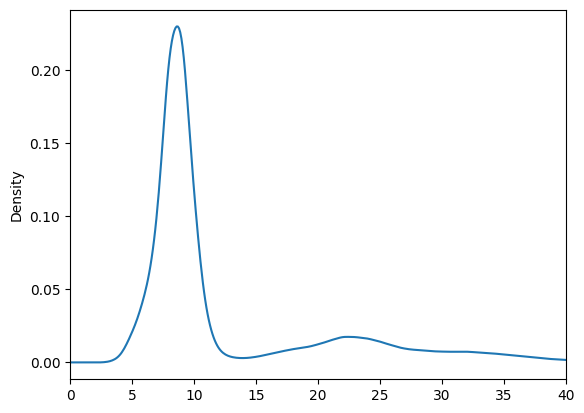

In [16]:
# Examinamos la distribución de la variable objetivo para conocer si debemos balancear el dataset o no
hsptl_train_df['Stay (in days)'].plot(kind='kde',xlim=(0,40))

In [17]:
# Convertimos la variable 'Stay (in days)' a una categorica, poniendo el punto de corte justo en 8 días
hsptl_train_df = hsptl_train_df.assign(StayLength=pd.cut(hsptl_train_df['Stay (in days)'],[0,8,999],labels=[0,1])).drop('Stay (in days)',axis=1)

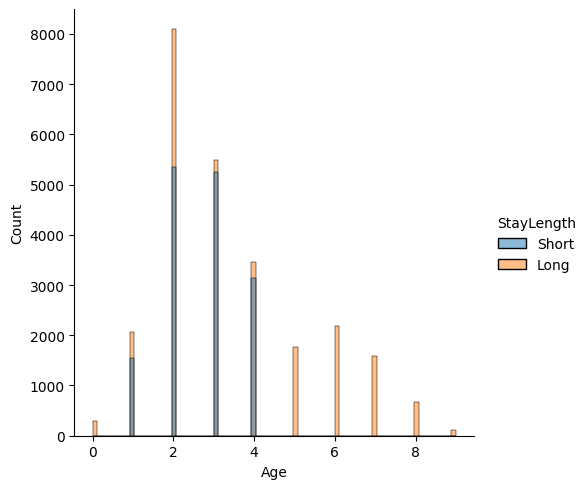

In [22]:
# Hacemos una serie de displots para que junto a la matriz de correlación nos dé a conocer cuales variables serían ideales para nuestro modelo
sns.displot(hsptl_train_df.sample(frac=0.10),x='Age', hue='StayLength')

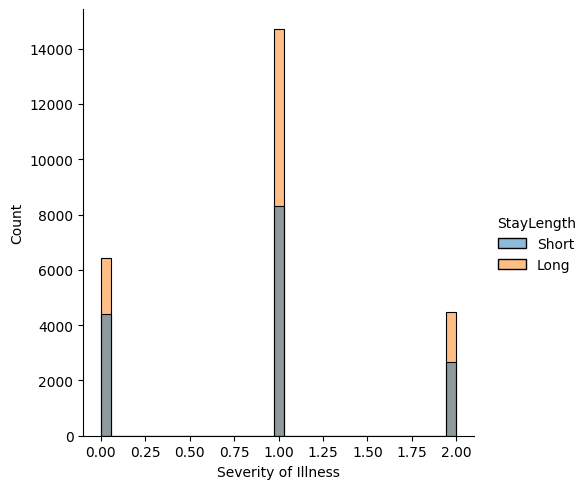

In [23]:
sns.displot(hsptl_train_df.sample(frac=0.10),x='Severity of Illness', hue='StayLength')

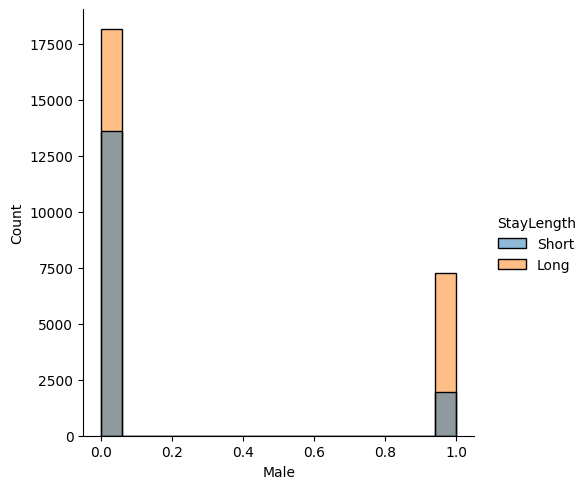

In [25]:
sns.displot(hsptl_train_df.sample(frac=0.10),x='Male', hue='StayLength')

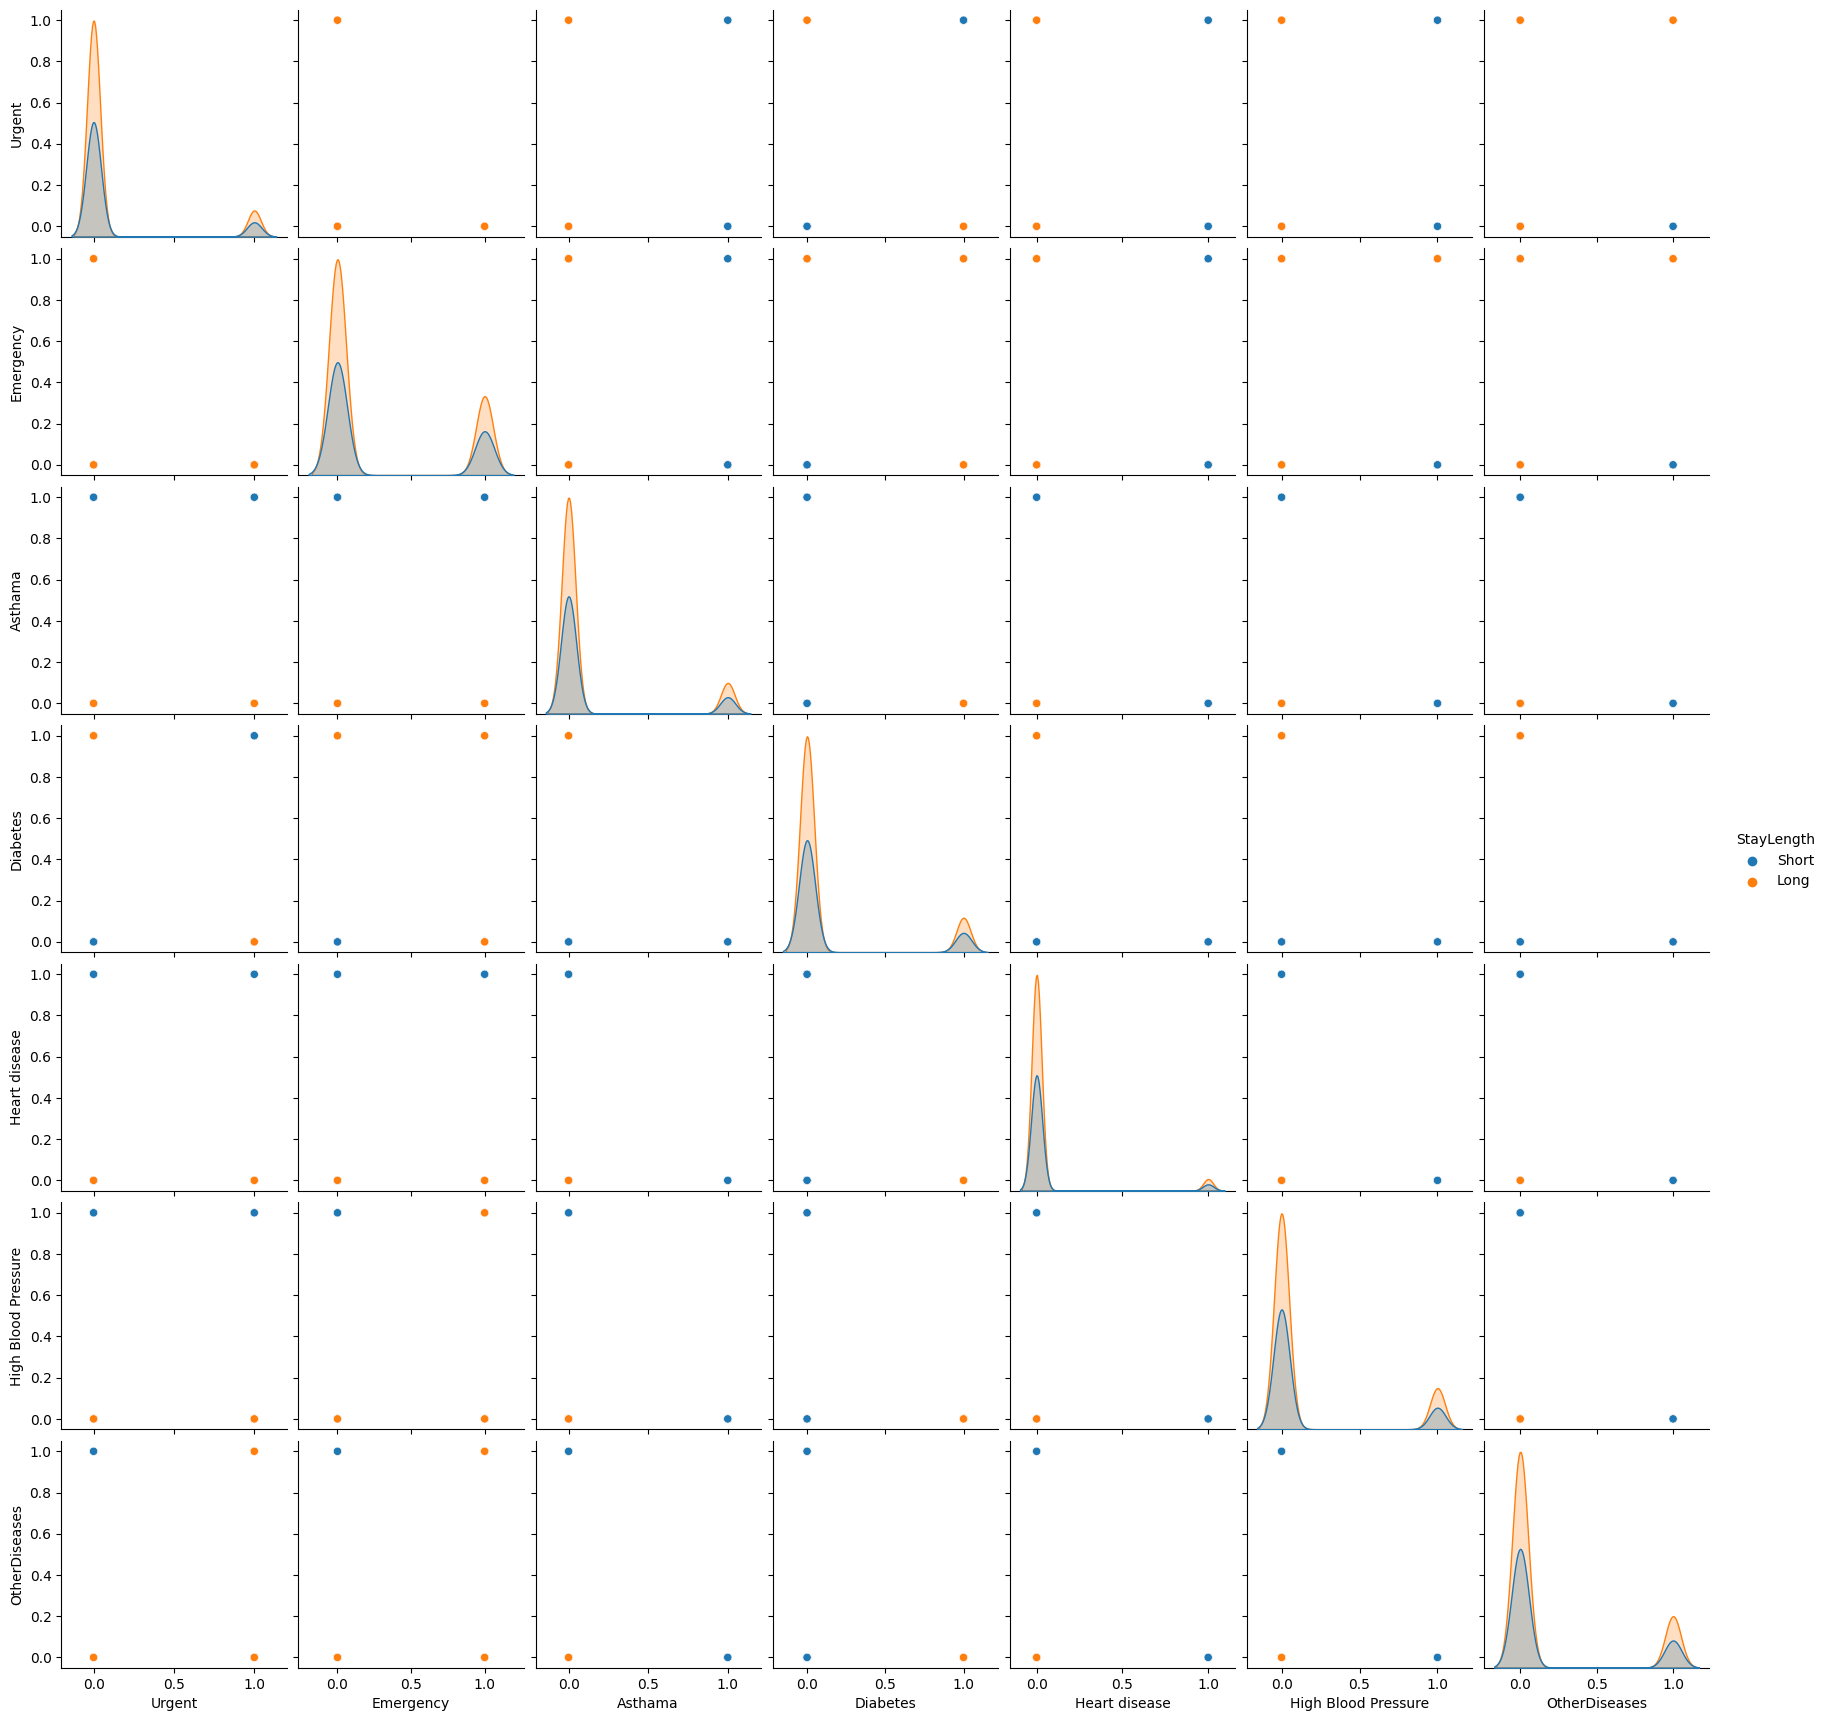

In [27]:
sns.pairplot(hsptl_train_df.sample(frac=0.10),hue='StayLength',vars=['Urgent', 'Emergency', 'Asthama', 'Diabetes','Heart disease','High Blood Pressure','OtherDiseases'])